<a href="https://colab.research.google.com/github/Sumanth-35/Task-1-CIT/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📌 Step 1: Install and Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# 📌 Step 2: Load IMDB Dataset (word index version)
# We'll use the top 10,000 words to keep vocabulary limited
num_words = 10000
(X_train_seq, y_train), (X_test_seq, y_test) = imdb.load_data(num_words=num_words)

# Load word index mapping
word_index = imdb.get_word_index()
index_word = {v+3: k for k, v in word_index.items()}
index_word[0] = "<PAD>"
index_word[1] = "<START>"
index_word[2] = "<UNK>"
index_word[3] = "<UNUSED>"



17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 📌 Step 3: Decode integer sequences back to text
def decode_review(text_seq):
    return ' '.join([index_word.get(i, '?') for i in text_seq])

# Convert sequences to text
X_train_text = [decode_review(x) for x in X_train_seq]
X_test_text = [decode_review(x) for x in X_test_seq]



In [ ]:
# 📌 Step 4: Text Preprocessing Function
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [stemmer.stem(t) for t in tokens]
    return " ".join(tokens)

# Apply preprocessing
X_train_clean = [preprocess_text(t) for t in X_train_text]
X_test_clean = [preprocess_text(t) for t in X_test_text]



In [ ]:
# 📌 Step 5: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train_clean)
X_test_vec = tfidf.transform(X_test_clean)



In [ ]:
# 📌 Step 6: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)



LogisticRegression(max_iter=1000)

✅ Accuracy: 0.87808

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88     12500
           1       0.87      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



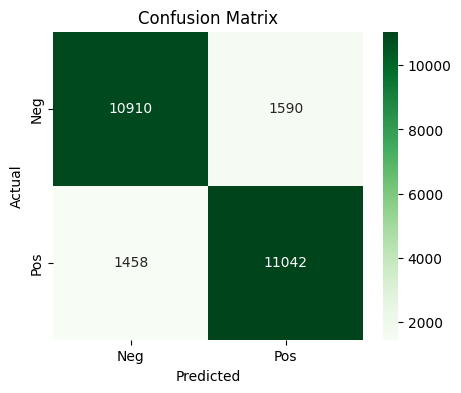

In [ ]:
# 📌 Step 7: Predictions & Evaluation
y_pred = model.predict(X_test_vec)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=["Neg", "Pos"], yticklabels=["Neg", "Pos"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

